# Guía 7: Métodos iterativos para sistemas lineales

In [384]:
import sympy as sp
import numpy as np
from sympy import *
from numpy.linalg import *

**Métodos iterativos**

Supongamos que queremos resolver $Ax=b$, pero la matriz $A$ es difícil de invertir. Entonces proponemos una descomposición $A = B+C$, donde $B$ es elegida de modo que sea *fácil* de invertir y escribimos: $Bx = -Cx+b$, o equivalentemente $x=-B^{-1}Cx+B^{-1}b$.

Llamando $M_I = -B^{-1}C$ (denominada *matriz de iteraciones*) y $B^{-1}b = \widetilde{b}$, resolver el sistema equivale a hallar $x$ tal que: $x = M_Ix + \widetilde{b}$.

La idea es tomar un vector inicial $x_0$ e iterar: 

$x_{n+1}= M_Ix_n + \widetilde{b}$, con la esperanza de que $x_k \rightarrow x$.

Si llamamos al error $e_k = x-x_k \implies e_{k+1}=M_Ie_k=M_I^{k+1}e_0 \implies (e_k \rightarrow 0 \iff M_I^{k} \rightarrow 0 \iff \rho(M_I)<1)$

Más aún $||e_k|| \leq C \rho(M_I)^k$ lo que nos da la velocidad de convergencia del algoritmo.

## Ejercicio 1

Escribir un programa que implemente el método de Jacobi y otro que implemente el método de Gauss-Seidel para la resolución de un sistema lineal $Ax = b$, con las siguientes condiciones:

- que finalice si el método se estaciona.
- que finalice con una advertencia si se excede cierto tope de iteraciones.

*Sugerencia: investigar los comandos np.tril , np.triu y np.diag*

Si tomamos $A = L + D + U$ (triangular inferior + diagonal + triangular superior), podemos ensayar varias descomposiciones $A= B + C$

### Método de Jacobi

Tomamos $B=D \implies M_J = -D^{-1}(L+U)$ es la matriz de iteración. 
Notemos que $a_{ii} \neq 0 \forall i$, sino $D$ no sería inversible (si tomaramos $D$ con la diagonal igual a la de $A$).

$\implies \forall i,\ 1 \leq i \leq n, \ \sum_{j=1}^{n}a_{ij}x_j = b_i \implies x_i = \frac{b_i - \sum_{j=1, j \neq i}^{n}a_{ij}x_j}{a_{ii}}$

La iteración quedaría:

$ \Large x_i^{(k+1)} = \frac{b_i - \sum_{j=1, j \neq i}^{n}a_{ij}x_j^{(k)}}{a_{ii}}$



In [615]:
def f_jacobi(A, b, max_k):
    n = len(b)
    x = np.random.rand(n)  # Vector inicial con valores aleatorios
    stationed = False  # Variable para controlar la convergencia
    k = 0

    while k < max_k and not stationed:
        x_k = np.copy(x)  # Crear una copia de x para la iteración
        for i in range(n):
            # Calcular las sumas necesarias para la fórmula del método de Jacobi
            sum1 = np.dot(A[i, :i], x[:i])  # Suma para j < i
            sum2 = np.dot(A[i, i+1:], x[i+1:])  # Suma para j > i
            x_k[i] = (b[i] - sum1 - sum2) / A[i, i]  # Actualización de x_k[i]
        
        # Verificar si x_k y x son lo suficientemente cercanos
        if np.allclose(x_k, x, atol=1e-8):
            stationed = True
        else:
            x = x_k  # Actualizar x para la siguiente iteración

        k += 1  # Incrementar el contador de iteraciones

    # Verificar si se alcanzó el tope de iteraciones sin convergencia
    if not stationed:
        print("Se excedió el tope de iteraciones")

    return x

### Método de Gauss Seidel

Tomamos $B=L+D \implies M_{GS} = -(L+D)^{-1}U$ es la matriz de iteración.

$\Large x_i^{(k+1)} = \left( - \sum_{j=i+1}^{n}a_{ij}x_j^{(k)} - \sum_{j=1}^{i-1}a_{ij}x_j^{(k+1)} + b_i \right)/a_{ii}$

In [185]:
def f_gauss_seidel(A, b, max_k):
    n = len(b)
    x = np.random.rand(n)  # Vector inicial con valores aleatorios
    stationed = False  # Variable para controlar la convergencia
    k = 0

    while k < max_k and not stationed:
        x_k = np.copy(x)  # Crear una copia de x para la iteración
        for i in range(n):
            # Calcular las sumas necesarias para la fórmula del método de Gauss Seidel
            sum1 = np.dot(A[i, :i], x_k[:i])  # Suma para j < i
            sum2 = np.dot(A[i, i+1:], x[i+1:])  # Suma para j > i
            x_k[i] = (b[i] - sum1 - sum2) / A[i, i]  # Actualización de x_k[i]
        
        # Verificar si x_k y x son lo suficientemente cercanos
        if np.allclose(x_k, x, atol=1e-8):
            stationed = True
        else:
            x = x_k  # Actualizar x para la siguiente iteración

        k += 1  # Incrementar el contador de iteraciones

    # Verificar si se alcanzó el tope de iteraciones sin convergencia
    if not stationed:
        print("Se excedió el tope de iteraciones")

    return x

## Ejercicio 2

*El objetivo de este ejercicio es probar que el radio espectral de una matriz $A\in \mathbb{R}^{n \times n}$ acota inferiormente a toda norma de $A$, sin utilizar normas complejas.*

Dada $A \in \mathbb{R}^{n \times n}$, sea $\lambda = a + ib$ un autovalor de $A$ y sea $u + iv$ el autovector correspondiente, con $a, b \in \mathbb{R}$, $u,v \in \mathbb{R}^n$

a) Calcular $Au$ y $Av$ y probar que: $||Au||_2^2 + ||Av||_2^2 = (a^2 + b^2)(||u||_2^2 + ||v||_2^2)$

**Demostración:**

$A(u+iv) = (a+ib)(u+iv) \implies Au + iAv = (a+ib)u + (a+ib)iv = au-bv +i(bu+av)$

$\implies \begin{cases} Au = au-bv \\ Av = bu+av \end{cases} \implies \begin{cases} ||Au||_2^2 = ||au-bv||_2^2 = a^2||u||_2^2 -2ab v^tu + b^2||v||_2^2 \\ ||Av||_2^2 = ||bu+av||_2^2 = b^2||u||_2^2 +2ab v^tu + a^2||v||_2^2 \end{cases} \implies ||Au||_2^2 + ||Av||_2^2 = (a^2 + b^2)(||u||_2^2 + ||v||_2^2)$

b) Concluir que: $|\lambda| \leq ||A||_2$

(1): $|\lambda|^2 = a^2 + b^2$ 

(2): $ \begin{cases} ||Av||_2\leq ||A||_2||v||_2 \\ ||Au||_2\leq ||A||_2||u||_2 \end{cases} \implies \begin{cases} ||Av||_2^2 \leq ||A||_2^2||v||_2^2 \\ ||Au||_2^2 \leq ||A||_2^2||u||_2^2 \end{cases}$

Por el ítem (a), (1) y (2) se tiene:

$||Av||_2^2 + ||Au||_2^2 = |\lambda|^2(||u||_2^2 + ||v||_2^2) \leq ||A||_2^2(||v||_2^2 + ||u||_2^2)$

Si $(||v||_2^2 + ||u||_2^2) = 0$ es trivial, supongamos que $(||v||_2^2 + ||u||_2^2) \neq 0$:

$\implies |\lambda|^2 \leq ||A||_2^2 \implies |\lambda| \leq ||A||_2$

c) Probar que dada una norma cualquiera $|| \ .||$ en $\mathbb{R}^{n \times n}$ vale que $|\lambda| \leq ||A||$.

*Sugerencia: Usar la equivalencia de normas. Notar que si $B = A^m$, entonces $\lambda^m$ es autovalor de $B$.*

Por la equivalencia de normas, vale que 

$c||A||_2 \leq ||A|| \leq C||A||_2$ con $c, C$ constantes positivas.

Por el ítem anterior, sabemos que $||\lambda||\leq c||A||_2$. Luego, vale que $||\lambda||\leq ||A||$.

## Ejercicio 3

Considerar el sistema $Ax=b$ para $A= \begin{pmatrix} 64 & -6 \\ 6 & -1 \end{pmatrix}$ y $b= \begin{pmatrix}1 & 2 \end{pmatrix}^t$.

a) Demostrar que el método de Jacobi converge para todo dato inicial.

Sea $J$ la matriz de iteraciones del método de Jacobi, esto equivale a mostrar que $\lim_{k \rightarrow \infty} J^k = 0 $

$A = \begin{pmatrix} 64 & -6 \\ 6 & -1 \end{pmatrix} \implies J= -D^{-1}(L+U)=-\begin{pmatrix}\frac{1}{64} & 0 \\ 0 & -1 \end{pmatrix}\left( \begin{pmatrix}0 & 0 \\ 6 & 0 \end{pmatrix} + \begin{pmatrix}0 & -6 \\ 0 & 0\end{pmatrix} \right)$

$\implies J = \begin{pmatrix}-\frac{6}{64} & 0 \\ 0 & 6\end{pmatrix}\cdot \begin{pmatrix}0 & -1 \\ 1 & 0\end{pmatrix}= \begin{pmatrix}0 & \frac{3}{32} \\ 6 & 0\end{pmatrix}$

Como los autovalores son $-\frac{3}{4}$ y $\frac{3}{4}$, considerando la descomposición de schur de $J$ tenemos que $\lim_{k \rightarrow \infty} J^k = 0 $.

In [316]:
J = Matrix([[0, sp.Rational(3/32)],[6,0]])
J.eigenvals() 

{-3/4: 1, 3/4: 1}

b) Sea $J$ la matriz de iteración. Hallar las normas $1, \infty$ y $2$ de $J$. ¿Contradice la convergencia del método?

Por el ítem anterior sabemos que $J =\begin{pmatrix}0 & \frac{3}{32} \\ 6 & 0\end{pmatrix}$

$||J||_{\infty}= max_{1 \leq i \leq n}\{ \sum_{j=1}^{n} |J_{ij}| \}=6$

$||J||_1 = max_{1 \leq j \leq n}\{ \sum_{i=1}^{n} |J_{ij}| \} = 6$

$||J||_2 = \sigma_1 = 6$

Estas normas no contradicen la convergencia del método. La convergencia del método de Jacobi depende de los autovalores de la matriz de iteración, no de sus normas. Sin embargo hay un teorema que dice que el radio espectral de la matriz de iteración es igual al ínfimo de todas las normas subordinadas. Entonces: $\rho(J) = inf_{||.||}||J||$.

Por el ítem (a) sabemos que Jacobi converge para todo dato inicial en este caso, luego $\rho(J)<1$. Por lo tanto existe una norma subordinada para la cual $||J||<1$.

c) Hallar una norma $||.||$ en la cual $||J||$ sea $<1$. *Sugerencia: Considerar una base de autovectores de J*

Por definición $||J|| = max_{||x||=1}||Jx||$

$\implies ||Jx|| \leq ||J||$

Queremos hallar $||.||_*$ tal que $\frac{3}{4} = |\lambda_{max}|=\rho(J)= inf_{||.||}||J|| = ||J||_* = max_{||x||_*=1}||Jx||_*$

Construimos la norma considerando una base de autovectores de J: $base=\{ (\frac{1}{8}, 1),(-\frac{1}{8}, 1)\}$  

Definimos la nueva norma $||x||_∗$ como la norma euclidiana (norma 2) pero aplicada a los vectores transformados por la matriz de autovectores como columna (llamemosla $C$). Es decir: $||x||_∗=||Cx||_2$.

Sea $x$ tal que $||x||_* =1$. Si escribimos a $x$ en la base de autovectores: $x= \alpha_1v_1 + \alpha_2v_2 \implies Jx = \alpha_1\lambda_1v_1 + \alpha_2\lambda_2v_2$

**SIN TERMINAR**

In [329]:
avecs = J.eigenvects()
base = [avecs[1][2][0],avecs[0][2][0]]
C = base[0].row_join(base[1])
D = Matrix([[sp.Rational(3,4), 0],[0,sp.Rational(-3,4)]])
x = Matrix([[1],[0]])



Matrix([
[1/8],
[  1]])

## Ejercicio 4

Decidir para cada una de las siguientes matrices si los métodos de Jacobi y de Gauss-Seidel convergen.

$A = \begin{pmatrix} 1 & 1 & 0 \\ -1 & 2 & 1 \\ 0 & 0 & 1 \end{pmatrix}$

$B = \begin{pmatrix} 1 & 0 & -1 \\ -2 & 1 & 1 \\ -1 & 0 & 1 \end{pmatrix}$

$C = \begin{pmatrix} 3 & -1 & -4 \\ -1 & 5 & 7 \\ -4 & 7 & 14 \end{pmatrix}$

**Criterios de convergencia:**

- Jacobi:
  Converge si la matriz de iteración $J=-D^{−1}(L+U)$ tiene $\rho(J)<1$, donde:
  
  -D: diagonal de A,
  
  -L: componentes estrictamente inferiores de A,

  -U: componentes estrictamente superiores de A.

  Criterio práctico: Si A es estrictamente diagonalmente dominante, entonces Jacobi converge.

- Gauss-Seidel:
  Converge si la matriz de iteración $G=-(D+L)^{−1}U$ tiene $\rho(G)<1$.
  
  Criterio práctico: Si A es estrictamente diagonalmente dominante o hermitiana y definida positiva, entonces Gauss-Seidel converge.

A: A no es estrictamente diagonal dominante. 

In [472]:
A = np.array([[1, 1, 0], 
              [-1, 2, 1], 
              [0, 0, 1]])

L = np.tril(A, -1)  # Parte inferior (sin la diagonal)
U = np.triu(A, 1)   # Parte superior (sin la diagonal)
D = np.diag(np.diag(A))  # Extraer la diagonal

# Calcular la matriz de Jacobi: J = -(D + L)_inv * U
D_inv = np.linalg.inv(D)  # Inversa de D
J = -np.dot(D_inv, (L + U))

# Calcular los autovalores de J
eigenvalues_J = np.linalg.eigvals(J)

# Calcular el radio espectral de J
spectral_radius_J = max(abs(ev) for ev in eigenvalues_J)
print(f"rho(J): {spectral_radius_J}")

# Calcular la matriz de Gauss-Seidel: GS = -D_inv * (L + U)
GS = -np.linalg.inv(L + D).dot(U)

# Calcular los autovalores de GS
eigenvalues_GS = np.linalg.eigvals(GS)

# Calcular el radio espectral de GS
spectral_radius_GS = max(abs(ev) for ev in eigenvalues_GS)
print(f"rho(GS): {spectral_radius_GS}")


rho(J): 0.7071067811865476
rho(GS): 0.5


B no es estrictamente diagonal dominante.

In [470]:
B = np.array([[1, 0, -1], 
              [-2, 1, 1], 
              [-1, 0, -1]])

L = np.tril(B, -1)  # Parte inferior (sin la diagonal)
U = np.triu(B, 1)   # Parte superior (sin la diagonal)
D = np.diag(np.diag(B))  # Extraer la diagonal

# Calcular la matriz de Jacobi: J = -(D + L)_inv * U
D_inv = np.linalg.inv(D)  # Inversa de D
J = -np.dot(D_inv, (L + U))

# Calcular los autovalores de J
eigenvalues_J = np.linalg.eigvals(J)

# Calcular el radio espectral de J
spectral_radius_J = max(abs(ev) for ev in eigenvalues_J)
print(f"rho(J): {spectral_radius_J}")

# Calcular la matriz de Gauss-Seidel: GS = -D_inv * (L + U)
GS = -np.linalg.inv(L + D).dot(U)

# Calcular los autovalores de GS
eigenvalues_GS = np.linalg.eigvals(GS)

# Calcular el radio espectral de GS
spectral_radius_GS = max(abs(ev) for ev in eigenvalues_GS)
print(f"rho(GS): {spectral_radius_GS}")


rho(J): 1.0
rho(GS): 1.0


C no es estrictamente diagonal dominante pero es simétrica.

In [479]:
C = np.array([[3, -1, -4], 
              [-1, 5, 7], 
              [-4, 7, 14]])

L = np.tril(C, -1)  # Parte inferior (sin la diagonal)
U = np.triu(C, 1)   # Parte superior (sin la diagonal)
D = np.diag(np.diag(C))  # Extraer la diagonal

# Calcular la matriz de Jacobi: J = -(D + L)_inv * U
D_inv = np.linalg.inv(D)  # Inversa de D
J = -np.dot(D_inv, (L + U))

# Calcular los autovalores de J
eigenvalues_J = np.linalg.eigvals(J)

# Calcular el radio espectral de J
spectral_radius_J = max(abs(ev) for ev in eigenvalues_J)
print(f"rho(J): {spectral_radius_J}")

# Calcular la matriz de Gauss-Seidel: GS = -D_inv * (L + U)
GS = -np.linalg.inv(L + D).dot(U)

# Calcular los autovalores de GS
eigenvalues_GS = np.linalg.eigvals(GS)

# Calcular el radio espectral de GS
spectral_radius_GS = max(abs(ev) for ev in eigenvalues_GS)
print(f"rho(GS): {spectral_radius_GS}")


rho(J): 1.1726169935203983
rho(GS): 0.8590811247661537


## Ejercicio 5

Decidir para cada uno de los siguientes sistemas, si los métodos de Jacobi y de Gauss-Seidel son convergentes. En caso afirmativo usarlos para resolver el sistema. Si ambos métodos convergen, determinar cuál converge más rápido ¿Es la matriz del sistema diagonal dominante? ¿Y simétrica y definida positiva?

El método que converge más rápido es el de menor radio espectral.

a) $\begin{pmatrix} 3 & 1 & 1 \\ 2 & 6 & 1 \\ 1 & 1 & 4 \end{pmatrix}\begin{pmatrix}x_1 \\ x_2 \\ x_3 \end{pmatrix} = \begin{pmatrix} 5 \\ 9 \\ 6 \end{pmatrix}$ 

$A=\begin{pmatrix} 3 & 1 & 1 \\ 2 & 6 & 1 \\ 1 & 1 & 4 \end{pmatrix}=\begin{pmatrix} 0 & 0 & 0 \\ 2 & 0 & 0 \\ 1 & 1 & 0 \end{pmatrix} + \begin{pmatrix} 3 & 0 & 0 \\ 0 & 6 & 0 \\ 0 & 0 & 4 \end{pmatrix}+\begin{pmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{pmatrix}= L+D+U $

Como $A$ es estrictamente diagonal dominante, Jacobi y Gauss-Seidel convergen. $A$ no es simétrica definida positiva. 

*Jacobi*

$J = -D^{-1}(L+U) = \begin{pmatrix} -\frac{1}{3} & 0 & 0 \\ 0 & -\frac{1}{6} & 0 \\ 0 & 0 & -\frac{1}{4} \end{pmatrix} \begin{pmatrix} 0 & 1 & 1 \\ 2 & 0 & 1 \\ 1 & 1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & -\frac{1}{3} & -\frac{1}{3} \\ -\frac{1}{3} & 0 & -\frac{1}{6} \\ -\frac{1}{4} & -\frac{1}{4} & 0\end{pmatrix} \implies \rho(J)\approx 0.558$

*Gauss-Seidel*

$GS = -(L+D)^{-1}U = -\begin{pmatrix} 3 & 0 & 0 \\ 2 & 6 & 0 \\ 1 & 1 & 4 \end{pmatrix}^{-1} \begin{pmatrix} 0 & 1 & 1 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & -\frac{1}{3} & -\frac{1}{3} \\ 0 & \frac{1}{9} & -\frac{1}{18} \\ 0 & \frac{1}{18} & \frac{7}{72} \end{pmatrix} \implies \rho(GS) \approx 0.118$

$$
\therefore \text{Gauss-Seidel converge más rápido}
$$

In [598]:
# Cálculo simbólico de GS
A = sp.Matrix([[3, 1, 1],
               [2, 6, 1],
               [1, 1, 4]])

# Separar A en D, L y U
D = sp.Matrix(np.diag(np.diag(A)))
L = sp.Matrix(np.tril(A,-1))
U = sp.Matrix(np.triu(A, 1))          # Triangular superior estricta

# Calcular la matriz de iteración para Gauss-Seidel
L_plus_D_inv = (L + D).inv()  # Inversa de (L + D)
T_GS = -L_plus_D_inv * U      # Matriz de iteración

# Calcular los autovalores simbólicamente
eigenvalues = T_GS.eigenvals()

# Radio espectral (máximo valor absoluto de los autovalores)
spectral_radius = max([abs(val) for val in eigenvalues.keys()])

# Mostrar los resultados
print("Matriz de iteración T_GS:")
display(T_GS)
print("\nAutovalores de T_GS:")
display(eigenvalues)
print(f"\nRadio espectral de T_GS: {spectral_radius}")



Matriz de iteración T_GS:


Matrix([
[0, -1/3,  -1/3],
[0,  1/9, -1/18],
[0, 1/18,  7/72]])


Autovalores de T_GS:


{5/48 - sqrt(7)*I/48: 1, 5/48 + sqrt(7)*I/48: 1, 0: 1}


Radio espectral de T_GS: sqrt(2)/12


In [601]:
#Calculo de los radios espectrales 

A = np.array([[3,1,1],[2,6,1],[1,1,4]])
L = np.tril(A, -1)
D = np.diag(np.diag(A))
U = np.triu(A,1)

# Calcular la matriz de Jacobi: J = -(D + L)_inv * U
D_inv = np.linalg.inv(D)  # Inversa de D
J = -np.dot(D_inv, (L + U))

# Calcular los autovalores de J
eigenvalues_J = np.linalg.eigvals(J)

# Calcular el radio espectral de J
spectral_radius_J = max(abs(ev) for ev in eigenvalues_J)
print(f"rho(J): {spectral_radius_J}")

# Calcular la matriz de Gauss-Seidel: GS = -D_inv * (L + U)
GS = -np.linalg.inv(L + D).dot(U)

# Calcular los autovalores de GS
eigenvalues_GS = np.linalg.eigvals(GS)

# Calcular el radio espectral de GS
spectral_radius_GS = max(abs(ev) for ev in eigenvalues_GS)
print(f"rho(GS): {spectral_radius_GS}")


rho(J): 0.5575346466519526
rho(GS): 0.1178511301977579


In [625]:
# Uso de las funciones del ejercicio 1 para resolver el sistema
A = np.array([[3,1,1],[2,6,1],[1,1,4]])
b = np.array([[5],[9],[6]])

x_j = f_jacobi(A,b,200)
x_gs = f_gauss_seidel(A,b,200)

print(x_j)
print(x_gs)

[1.00000383 1.00000324 1.00000317]
[0.99999967 1.00000168 0.99999966]


/tmp/ipykernel_251980/2248560032.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_k[i] = (b[i] - sum1 - sum2) / A[i, i]  # Actualización de x_k[i]


b) $\begin{pmatrix}5 &7& 6& 5 \\ 7 & 10& 8 & 7 \\ 6 & 8 & 10 & 9 \\ 5 & 7 & 9 & 10 \end{pmatrix}\begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4 \end{pmatrix} = \begin{pmatrix}23 \\ 32 \\ 33 \\ 31 \end{pmatrix}$

No es estrictamente diagonal dominante pero es simétrica, para saber si es definida positiva calculo los menores principales y veo si son positivos: 

In [647]:
B = np.array([[5,7,6,5],[7,10,8,7],[6,8,10,9],[5,7,9,10]])

def_pos = det(B[:1,:1]) >0 and det(B[:2,:2])>0 and det(B[:3,:3])>0 and det(B[:4,:4])>0  
print(def_pos)

True


Como es simétrica definida positiva, Gauss-Seidel converge. Jacobi podría o no converger.

In [650]:
#Calculo de los radios espectrales 
L = np.tril(B, -1)
D = np.diag(np.diag(B))
U = np.triu(B,1)

# Calcular la matriz de Jacobi: J = -(D + L)_inv * U
D_inv = np.linalg.inv(D)  # Inversa de D
J = -np.dot(D_inv, (L + U))

# Calcular los autovalores de J
eigenvalues_J = np.linalg.eigvals(J)

# Calcular el radio espectral de J
spectral_radius_J = max(abs(ev) for ev in eigenvalues_J)
print(f"rho(J): {spectral_radius_J}")

# Calcular la matriz de Gauss-Seidel: GS = -D_inv * (L + U)
GS = -np.linalg.inv(L + D).dot(U)

# Calcular los autovalores de GS
eigenvalues_GS = np.linalg.eigvals(GS)

# Calcular el radio espectral de GS
spectral_radius_GS = max(abs(ev) for ev in eigenvalues_GS)
print(f"rho(GS): {spectral_radius_GS}")


rho(J): 2.4757914511516166
rho(GS): 0.9968975928986463


Como $\rho(J) \approx 2.48 >= 1$, Jacobi no converge.
Confirmamos que $\rho(GS) < 1$.

In [654]:
b = np.array([[23],[32],[33],[31]])

x_gs = f_gauss_seidel(B,b,200)

print(x_gs)

Se excedió el tope de iteraciones
[1.22584218 0.86426019 0.9426581  1.03370449]


/tmp/ipykernel_251980/3409270281.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_k[i] = (b[i] - sum1 - sum2) / A[i, i]  # Actualización de x_k[i]


## Ejercicio 6

a) Mostrar que toda matriz $B \in \mathbb{R}^{n\times n}$ con $|det(B)| > 1$ tiene un autovalor $\lambda$, real o complejo, con $|\lambda| > 1$.

Demo por el contrarrecíproco:

Sea $|\lambda|$ autovalor de $B$ tal que $|\lambda| \leq 1$ con autovector asociado $v \implies \ $ $||Bv|| =||\lambda v|| = |\lambda | ||v|| \leq ||v|| $.

Como la transformación lineal dada por $B$ reduce o mantiene la norma de $v$, se tiene que $|det(B)| \leq 1$ ya que el determinante de la matriz nos dice cuánto escala el espacio transformado.

$\therefore |det(B)|>1 \implies |\lambda|>1$

obs: Vale que $|\lambda|>1  \implies |det(B)|>1$. Es decir es un si y solo si.

obs: Vale que $|det(B)|<1 \implies |\lambda|<1 $ pero esto no implica que Gauss-Seidel y Jacobi convergen, solo nos dice que hay un autovalor con módulo menor a 1. 

b) Decidir si el método de Jacobi converge o no para un sistema dado por la matriz:

$A = \begin{pmatrix} −1 & 1 & 2 \\
4 & −1 & 3 \\
5 & 6 & −1\end{pmatrix}$

Calculo la matriz de iteración y calculo su determinante, si es mayor a 1 por el ítem anterior vale que Jacobi diverge.

In [679]:
A = np.array([[-1,1,2],[4,-1,3],[5,6,-1]])
L = np.tril(A,-1)
D = np.diag(np.diag(A))
U = np.triu(A, 1)

J = -inv(D) @ (L+U)
print(det(J))

62.99999999999999


Como $|det(J)|>1$ Jacobi diverge.

## Ejercicio 7

Probar que el método de Jacobi converge para todo sistema de 2×2 dado por una matriz simétrica y definida positiva.

Sea $A = \begin{pmatrix} a & b \\ b & c\end{pmatrix}, a,b,c \in \mathbb{R}$. Notamos que es simétrica y como es definida positiva sus menores principales son positivos, es decir que $a>0$ y $ac - b^2>0 \implies ac > b^2 > 0 \implies c>0 \implies J = -D^{⁻1}(L+U)= \begin{pmatrix} 0 & -\frac{b}{a} \\ -\frac{b}{c} & 0 \end{pmatrix} \implies $ los autovalores son $\frac{b}{\sqrt{ac}}$ y $-\frac{b}{\sqrt{ac}} \implies \rho(J)<1$ 


## Ejercicio 8

Sean $A, B \in \mathbb{R}^{3\times 3}$ las matrices

$A= \begin{pmatrix} 
a & c & 0 \\
c & a & c \\
0 & c & a \\
\end{pmatrix}$

$B= \begin{pmatrix}
0 & b & 0 \\
b & 0 & b \\
0 & b & 0 \\
\end{pmatrix}$

a) Probar que $\lim_{n\rightarrow \infty} B^n = 0 $ si y sólo si $|b| < \sqrt{2}/2$.

El límite tiende a 0 si $|\lambda_{max}|<1$. Calculando los autovalores de $B$ vemos que son $0, \sqrt{2}b$ y $-\sqrt{2}b$ $\implies |\lambda_{max}| = max\{0, |\sqrt{2}b|, |-\sqrt{2}b|\}= |\sqrt{2}b|= \sqrt{2}|b| < 1 \iff |b| < \frac{\sqrt{2}}{2}$



b) Dar condiciones necesarias y suficientes sobre $a,c \in \mathbb{R}$ para la convergencia del método de Jacobi aplicado a la resolución de $Ax = v$.

$J= \begin{pmatrix} -\frac{1}{a} & 0 & 0 \\ 0 & -\frac{1}{a} & 0 \\ 0 & 0 & -\frac{1}{a} \end{pmatrix} \begin{pmatrix}0 & c & 0 \\
c & 0 & c \\
0 & c & 0 \\
\end{pmatrix} = \begin{pmatrix}0 & -\frac{c}{a} & 0 \\ -\frac{c}{a} & 0 & -\frac{c}{a} \\ 0 & -\frac{c}{a} & 0 \\ \end{pmatrix}$

Primero que nada $a\neq 0$ para que $D$ sea invertible. Luego, por el item anterior debe ser $|\frac{c}{a}| < \frac{\sqrt{2}}{2} \implies |c|<\frac{\sqrt{2}|a|}{2}$

## Ejercicio 9

a) Sean $M, N \in \mathbb{R}^{n\times n}$, con $M$ inversible. Probar que los autovalores de $−M^{−1}N$ son las raíces del polinomio $det(\lambda M + N)$

Sea $\lambda$ autovalor de $−M^{−1}N$ con autovector $v \neq 0$, $ \implies −M^{−1}Nv = \lambda v  \implies −MM^{−1}Nv = -Nv = \lambda Mv  \implies 0 = (\lambda M + N)v$

Es decir que $v \in Nu(\lambda M+N)$, como $v\neq 0$ para que esto ocurra $\lambda M + N$ debe ser singular es decir que $det(\lambda M + N)= 0$, por lo tanto $\lambda$ anula el polinomio.

b) Sean 

$A = \begin{pmatrix} 0 & 1 & 1+\frac{1}{\alpha} \\ 1 & \frac{1}{\alpha} & 0 \\ 1+\frac{1}{\alpha} & 1 & 0 \end{pmatrix}$

$M = \begin{pmatrix} 0 & 0 & \frac{1}{\alpha} \\ 0 & \frac{1}{\alpha} & 0 \\ \frac{1}{\alpha} & 0 & 0 \end{pmatrix}$

Para resolver un sistema $Ax=b$ se propone el método iterativo: 
$$x_{n+1}=-M^{-1}Nx_n + M^{-1}b, \ \ \ \ \ \ \ \ \ \ (1)$$ siendo $N=A-M$. 

Probar que si el método $(1)$ converge a $x$, entonces $x$ es solución del sistema $Ax=b$. 

**Demostración**:

Si el método $(1)$ converge a $x \implies x = -M^{-1}Nx + M^{-1}b = M^{-1}(-Nx+b) \implies Mx = -Nx+b \implies (M+N)x=b $

Como $N= A-M \implies M+N = A \implies x$ es solución de $Ax=b$.

c) Hallar todos los valores de $\alpha$ para los cuales el método propuesto converge.

Dado que la matriz de iteración del método es $I= -M^{-1}N$, debo ver para cuáles $\alpha$ se tiene que $\rho(I)<1$. Entonces calculo el máximo de los módulos de los autovalores de la matriz $I$ y veo para cuales $\alpha$ es menor a 1.

In [153]:
#Obtengo el polinomio característico de I
alpha = symbols('alpha')
lamda = symbols('lambda')

A = Matrix([
    [0, 1, 1 + 1/alpha], 
    [1, 1/alpha, 0], 
    [1 + 1/alpha, 1, 0]
])

M = Matrix([
    [0, 0, 1/alpha],
    [0, 1/alpha, 0],
    [1/alpha, 0 , 0]
])

M_inv = Matrix([
    [0, 0, alpha],
    [0, alpha, 0],
    [alpha, 0 , 0]
])

N = A-M

I = -M_inv*N

char_poly = I.charpoly(lamda)
char_expr = char_poly.as_expr()  
factored_poly = char_expr.factor()

display(factored_poly) #Visualizo el polinomio factorizado
#Calculo las raices del factor cuadrático
quadratic = alpha**2 - alpha*lamda - lamda**2
roots = sp.solve(quadratic, lamda)

#Muestro las raíces
print("Raíces")
display(-alpha)
display(roots[0])
display(roots[1])



-(alpha + lambda)*(alpha**2 - alpha*lambda - lambda**2)

Raíces


-alpha

alpha*(-1 + sqrt(5))/2

-alpha*(1 + sqrt(5))/2

Como el autovalor de mayor módulo es siempre $\lambda = -\frac{\alpha(1+\sqrt{5})}{2}$, los $\alpha$ tales que $\rho(I)<1$ satisfacen:

$|-\frac{\alpha(1+\sqrt{5})}{2}| < 1 \iff |\alpha(1+\sqrt{5})| < 2 \iff |\alpha|< \frac{2}{1 + \sqrt{5}} \iff -\frac{2}{1 + \sqrt{5}} < \alpha < \frac{2}{1 + \sqrt{5}}$

d) ¿Qué restricción impondrı́an sobre $\alpha$ si se quiere garantizar que el error $e_n = x_n −x$ satisfaga: $||e_n|| < \left( \frac{1}{n} \right)^n ||e_0||$ para alguna norma $|| \ .||$? **SIN TERMINAR**

## Ejercicio 10

Utilizar la iteración de Gauss-Seidel para resolver el sistema $A_nx = b_n$ para

$A_n = \begin{pmatrix} 1 & 2 \\ 2 & 4+\frac{1}{n^2} \end{pmatrix}$

$b_n = \begin{pmatrix} 1 & 2-\frac{1}{n^2}\end{pmatrix}^t$

¿Cómo es la convergencia? ¿Tiene esto que ver con el mal condicionamiento de $A$? Dar un ejemplo de una matriz mal condicionada para la cual la convergencia sea rápida.

La convergencia la obtenemos viendo el radio espectral de la matriz de iteraciones, es decir viendo el módulo del autovalor de máximo módulo de la matriz $M_{GS}= -\begin{pmatrix} 1 & 2 \\ 0 & 4+\frac{1}{n^2} \end{pmatrix}^{-1}\begin{pmatrix}0 & 0 \\ 2 & 0 \end{pmatrix} = \begin{pmatrix} -1 & 2(4+1/n^2)^{-1} \\ 0 & -(4+1/n^2)^{-1}\end{pmatrix}\begin{pmatrix}0 & 0 \\ 2 & 0 \end{pmatrix} = \begin{pmatrix} 4(4+1/n^2)^{-1} & 0 \\ -2(4+1/n^2)^{-1} & 0\end{pmatrix}$

Su polinomio característico es $\lambda(\lambda -4(4+1/n^2)^{-1}) \implies$ el radio espectral es $\rho(M_{GS})= 4(4+1/n^2)^{-1}$ que siempre es menor a 1.

Luego, Gauss-Seidel siempre converge.

Se observa que a medida que n crece en módulo el determinante de $A_n$ se acerca a 0, por lo que la matriz se acerca a una matriz singular. A su vez, a medida que n crece en módulo el radio espectral de la matriz de iteraciones de Gauss-Seidel es más grande por lo que la velocidad de convergencia es menor. En este caso podemos relacionar el mal condicionamiento de A con la lenta velocidad de convergencia, aunque no siempre sucede. Por ejemplo una matriz para la cual los valores singulares más chico y más grande difieren mucho en magnitud pero para la cual Gauss-Seidel converge rápidamente (es decir que los autovalores de la matriz de iteraciones son muy chicos en módulo) es:


$B =\begin{pmatrix}10^{6} & 0 \\ 0 & 10^{2} \end{pmatrix}$

Como los valores singulares son $10^{12}$ y $12^4$, el número de condición es $10^{12}/10^4 = 10^8 >> 1$.
Como los autovalores de la matriz de iteraciones son $-10^{-6}$ y $-10^{-2}$, el radio espectral es $10^{-2} <1$.

In [223]:
n_array= np.linspace(2,10,5)
print("A medida que n aumenta, la velocidad de convergencia disminuye, a partir de n=8 vemos que se exceden las 1000 iteraciones")
for n in n_array:
    A_n = np.array([[1,2],[2,4+1/(n**2)]])
    b_n = np.array([[1],[2-1/(n**2)]])
    print(n)
    x= f_gauss_seidel(A_n, b_n, 1000)
    print(x)

A medida que n aumenta, la velocidad de convergencia disminuye, a partir de n=8 vemos que se exceden las 1000 iteraciones
2.0
[ 2.99964008 -0.99983063]
4.0
[ 2.99868586 -0.99935304]
6.0
Se excedió el tope de iteraciones
[ 2.99699049 -0.99850562]
8.0


/tmp/ipykernel_5132/3409270281.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_k[i] = (b[i] - sum1 - sum2) / A[i, i]  # Actualización de x_k[i]


Se excedió el tope de iteraciones
[ 2.92229135 -0.96129686]
10.0
Se excedió el tope de iteraciones
[ 2.83337552 -0.91689552]


## Ejercicio 11

**Método SOR (Successive Over Relaxation)**

El método de sobre-relajación sucesiva (SOR), es una variante del método de Gauss-Seidel para estimar la solución de un sistema lineal de ecuaciones, permitiendo una convergencia más rápida. 

Dada $A \in \mathbb{R}^{n \times n} \ \ $ con $ \ \ a_{ii}\neq 0, \ 1 \leq i \leq n, \ A=L+D+U $

a) Demostrar que el sistema $Ax = b$ es equivalente al sistema $(D + \omega L)x = ((1 − \omega )D − \omega U )x + \omega b$, cualquiera sea $\omega \neq 0$.

$Ax=b \iff \omega Ax = \omega b \iff \omega (L+D+U)x = \omega b$

$\iff \omega L x = -\omega Dx -\omega Ux +\omega b \iff Dx + \omega L x = Dx -\omega Dx -\omega Ux +\omega b \iff (D + \omega L)x = ((1 − \omega )D − \omega U )x + \omega b$

Vale multiplicar por $\omega$ y por $Dx$ porque $\omega, a_{ii} \neq 0$



b) Considere el método iterativo $x^{k+1} = B(\omega)x^k + c$ con $B(\omega)=(D+\omega L)^{-1}((1-\omega)D - \omega U)$.

Probar que $det(B(\omega))=(1-\omega)^n$ y concluir que si el método converge $\implies \omega \in (0,2)$

$B(\omega)=(D+\omega L)^{-1}((1-\omega)D - \omega U) \implies det(B(\omega)) = det((D+\omega L)^{-1}((1-\omega)D - \omega U))= \frac{det((1-\omega)D - \omega U))}{det(D+\omega L)} = \frac{det((1-\omega)D)}{det(D)}= (1-\omega)^n$.

Probemos por el contrarrecíproco que si el método converge entonces $\omega \in (0,2)$. Es decir, probemos $\omega < 0 \ \lor \ \omega>2 \implies$ el método diverge. 

Por el ejercicio 6 sabemos que $|det(B(\omega))|>1 \iff \exists \lambda \ \text{autovalor}: |\lambda| > 1 $.

$\begin{cases} \omega>2 \implies -\omega < -2 \implies 1-\omega<-1 \\ \omega<0 \implies -\omega > 0 \implies 1-\omega>1 \end{cases} \implies |1- \omega|>1 \implies |det(B(\omega))|=|(1-\omega)^n| = |1-\omega|^n>1 \implies$ el método diverge.


c) Sea $A= \begin{pmatrix}1 & \frac{2}{3} \\ \frac{2}{3} & 1  \end{pmatrix}$. Compare los métodos para $\omega = \frac{3}{2}$ y $\omega = 1$. ¿Cuál elegiría y por qué?

In [346]:
A = np.array([[1, 2/3],[2/3, 1]])
b = np.array([[1+ 2/3],[1+ 2/3]]) #Elijo un vector de la imagen de A arbitrariamente 
L = np.tril(A,-1)
D = np.diag(np.diag(A))
U = np.triu(A,1)

omega = 3/2
B = np.linalg.inv(D+omega*L)@((1-omega)*D-omega*U)
c = np.linalg.inv(D+omega*L)@(omega*b)
print(B)
omega = 1
B = np.linalg.inv(D+omega*L)@((1-omega)*D-omega*U)
c = np.linalg.inv(D+omega*L)@(omega*b)
print(B)

[[-0.5 -1. ]
 [ 0.5  0.5]]
[[ 0.         -0.66666667]
 [ 0.          0.44444444]]


Si $\omega = 1$ entonces $B(\omega)$ es una matriz singular, esto no ocurre con $\omega = \frac{3}{2}$ por lo que es preferible este último valor de $\omega$.

## Ejercicio 12

Considerar la forma cuadrática $f(x,y)=\alpha x^2 + \beta y^2 + \gamma xy + \delta x + \varepsilon y + \eta$

a) Probar que si $\mathbf{x}=(x,y)^t$, entonces $f$ puede escribirse en forma matricial como: $\frac{1}{2}\mathbf{x^t Ax-x^t b}+ \eta$, para cierta $\mathbf{A}$ simétrica.

$f(x,y)=\alpha x^2 + \beta y^2 + \gamma xy + \delta x + \varepsilon y + \eta \iff \frac{1}{2}\begin{pmatrix}x & y \end{pmatrix}\begin{pmatrix}2\alpha & \gamma \\ \gamma & 2\beta \end{pmatrix}\begin{pmatrix}x \\ y \end{pmatrix} - \begin{pmatrix}x & y \end{pmatrix}\begin{pmatrix}-\delta \\ -\varepsilon \end{pmatrix}$


b) Probar que los puntos crı́ticos de $f$ son las soluciones del sistema $A\mathbf{x} = b$.

Los puntos críticos anulan el gradiente

$\implies \nabla f(\mathbf{x}) = ( 2\alpha x + \gamma y + \delta, 2\beta y + \gamma x + \varepsilon)^t = A\mathbf{x} - b = 0 \implies A\mathbf{x}=b$

c) Probar que $f$ tiene un mı́nimo (único) si y sólo si $A$ es definida positiva (estricta). Inversamente: $f$ tiene un máximo (único) si y sólo si $A$ es definida negativa (estricta).

Para que haya un único punto crítico (de modo que solo haya un mínimo o un máximo) debemos ver que $A$ sea inversible, porque de esa manera el sistema tiene solución única. Para que sea mínimo debemos ver que el determinante Hessiano evaluado en cualquier punto sea siempre positivo (curvatura positiva), para que sea máximo debemos ver que el determinante del Hessiano evaluado en cualquier punto sea siempre negativo (curvatura negativa). 

La curvatura en la dirección $v$ está determinada por la segunda derivada direccional:

$D_v^2f=v^tHv,$

$D_v^2​f=v^tHv,$

donde $H$ es la matriz Hessiana de $f$. Este valor indica cómo cambia $f$ cuando nos movemos en la dirección $v$:

Si $v^tHv>0$ para todas las $v\neq0$, $f$ tiene curvatura positiva en todas las direcciones. Esto es Hessiano definido positivo.
Si $v^tHv<0$ para todas las $v\neq0$, $f$ tiene curvatura negativa en todas las direcciones. Esto es Hessiano definido negativo.

En este caso $A$ coincide con el Hessiano.



d) Probar que si $A$ tiene autovalores $\lambda_1 < 0 < \lambda_2$ entonces $f$ tiene un punto silla (hallar una dirección en la que tenga un máximo y una dirección en la que tenga un mı́nimo).

Sea $A$ la matriz Hessiana de $f$.

Si $A$ tiene autovalores $\lambda_1 < 0$ y $\lambda_2 > 0$, esto implica que $A$ tiene una mezcla de curvaturas positivas y negativas. Este es el caso característico de un punto silla.

Dado que $A$ es simétrica, existe una base ortonormal de autovectores correspondientes a $\lambda_1$ y $\lambda_2$. Llamemos $\mathbf{v}_1 $ y $\mathbf{v}_2$ a los autovectores asociados a $\lambda_1$ y $\lambda_2$, respectivamente. Entonces, tenemos que:

$$
A \mathbf{v}_1 = \lambda_1 \mathbf{v}_1, \quad A \mathbf{v}_2 = \lambda_2 \mathbf{v}_2
$$

Análisis de las curvaturas en las direcciones $\mathbf{v}_1$  y $\mathbf{v}_2 $:

En la dirección $\mathbf{v}_1$, donde $ A $ tiene el autovalor $\lambda_1 < 0 $, la función tiene una curvatura negativa, es decir, un máximo.

En la dirección $\mathbf{v}_2 $, donde $ A $ tiene el autovalor $ \lambda_2 > 0 $, la función tiene una curvatura positiva, es decir, un mínimo.

Conclusión:

Como existe una dirección en la que la función tiene un máximo (en $ \mathbf{v}_1 $) y otra en la que tiene un mínimo (en $ \mathbf{v}_2 $), se concluye que el punto crítico asociado a $A$ es un punto silla.


e) ¿Cambia algo si la cuadrática está definida sobre $n$ variables $x_1, \cdots, x_n$ ?

El cambio principal cuando se pasa de dos a $n$ variables es que la matriz Hessiana $A$ tendrá más autovalores y autovectores, lo que aumenta la complejidad del análisis de las curvaturas en distintas direcciones. Sin embargo, el principio básico sigue siendo el mismo: un punto silla ocurre cuando hay una mezcla de autovalores positivos y negativos.

Si $A$ tiene autovalores negativos y positivos, entonces hay un punto silla en el origen, con máximos en las direcciones asociadas a los autovalores negativos y mínimos en las direcciones asociadas a los autovalores positivos. Si hay autovalores cero, la situación puede ser más compleja y depende de la estructura de esos autovalores.

## Ejercicio 13

Dada la analogı́a delineada en el ejercicio anterior, cuando $A$ es simétrica y definida positiva, tiene sentido pensar el problema $Ax = b$ como un problema de minimización. Los **métodos de descenso** toman un vector inicial $x^{(0)}$ y realizan la iteración: $x^{(k+1)} = x^{(k)} +t^k v^{(k)}$ , donde $v^{(k)}$ es una *dirección de descenso* elegida en cada paso y $t^k$ es un parámetro que indica cuánto moverse lo largo de la dirección $v^{(k)}$.

a) Probar que la dirección de máximo descenso de una función $f$ en un punto $x^{(0)}$ está dada por: $- \nabla f(x^{(0)})$. 

*Sug: recordar la derivada direccional de $f$ en la dirección de $v$ puede calcularse como $\frac{\partial f}{\partial v}(x)= \nabla f(x) \cdot v$*

El gradiente $\nabla f(x)$ es el vector que apunta en la dirección de mayor incremento de la función $f$ en el punto $x$. Luego, el vector que apunta en la dirección de menor incremento (o de máximo descenso) de la función es simplemente el opuesto: $- \nabla f(x)$.


b) Mostrar que para una función cuadrática como la del ejercicio anterior el gradiente negativo es el residuo: $−\nabla f(x) = r := b − Ax$.

Vimos en el ejercicio anterior que $\nabla f(x) = Ax - b $. Entonces tenemos que $-\nabla f(x)= b - Ax$.

c) El **método del gradiente** es un método de descenso en el que se elige como dirección de descenso el gradiente negativo: $v^{(k)}= -\nabla f(x^{(k)}) = r^{(k)}$. Probar que para $f$ cuadrática, la función $\varphi (t) = f(x^{(k)}+tr^{(k)})$ alcanza un mínimo en $t=\frac{r^{(k)t}r^{(k)}}{r^{(k)t}Ar^{(k)}}$. [Obs.: la función $\varphi$ es la cuadrática restringida a la recta con vector director $r^{(k)}$ que pasa por $x^{(k)}$ ]

$f(x)= \frac{1}{2}x^t Ax-x^t b+ \eta$

$\implies \varphi (t) = f(x^{(k)}+tr^{(k)}) = \frac{1}{2}(x^{(k)}+tr^{(k)})^t A(x^{(k)}+tr^{(k)})-(x^{(k)}+tr^{(k)})^t b+ \eta$

$\implies \varphi (t) = \frac{1}{2}(x^{(k)t}+tr^{(k)t}) A(x^{(k)}+tr^{(k)})-(x^{(k)t}+tr^{(k)t}) b+ \eta  $

$\implies \varphi (t) = \frac{1}{2}(x^{(k)t}A+tr^{(k)t}A)(x^{(k)}+tr^{(k)})-(x^{(k)t}b+tr^{(k)t}b)+ \eta  $

$\implies \varphi (t) = \frac{1}{2}(x^{(k)t}A(x^{(k)}+tr^{(k)})+tr^{(k)t}A(x^{(k)}+tr^{(k)}))-x^{(k)t}b-tr^{(k)t}b+ \eta  $

$\implies \varphi (t) = \frac{1}{2}x^{(k)t}Ax^{(k)}+\frac{t}{2}x^{(k)t}Ar^{(k)}+\frac{t}{2}r^{(k)t}Ax^{(k)}+\frac{t^2}{2}r^{(k)t}Ar^{(k)}-x^{(k)t}b-tr^{(k)t}b+ \eta  $

$\implies \varphi (t) = \frac{t^2}{2}r^{(k)t}Ar^{(k)}+\frac{t}{2}x^{(k)t}Ar^{(k)}+\frac{t}{2}r^{(k)t}Ax^{(k)}-tr^{(k)t}b+\frac{1}{2}x^{(k)t}Ax^{(k)}-x^{(k)t}b+ \eta  $

Como A es simétrica, $x^{(k)t}Ar^{(k)} = r^{(k)t}Ax^{(k)} \implies \frac{t}{2}x^{(k)t}Ar^{(k)}+\frac{t}{2}r^{(k)t}Ax^{(k)} = tx^{(k)t}Ar^{(k)}$ 

$\implies \varphi (t) = \frac{t^2}{2}r^{(k)t}Ar^{(k)}+t(x^{(k)t}Ar^{(k)} - r^{(k)t}b)+\frac{1}{2}x^{(k)t}Ax^{(k)}-x^{(k)t}b+ \eta  $

Derivamos para minimizar la función:

$\frac{d \varphi}{dt} = tr^{(k)t}Ar^{(k)}+x^{(k)t}Ar^{(k)} - r^{(k)t}b$

$\implies \frac{d \varphi}{dt} = 0 \iff t= \frac{r^{(k)t}b - x^{(k)t}Ar^{(k)}}{r^{(k)t}Ar^{(k)}}$

Como $r^{(k)}=-\nabla f(x^{(k)}) = b - Ax^{(k)}$

$\implies \frac{d \varphi}{dt} = 0 \iff t= \frac{r^{(k)t}(r^{(k)} + Ax^{(k)}) - x^{(k)t}Ar^{(k)}}{r^{(k)t}Ar^{(k)}} = \frac{r^{(k)t}r^{(k)} + r^{(k)t}Ax^{(k)} - x^{(k)t}Ar^{(k)}}{r^{(k)t}Ar^{(k)}} = \frac{r^{(k)t}r^{(k)}}{r^{(k)t}Ar^{(k)}}$

## Ejercicio 14

En el contexto del Ejercicio 13, mostrar que si la función $\varphi$ se define como $\varphi (t)= f(x^{(k)} + td^{(k)})$, donde $d^{(k)}$ es una dirección cualquiera, entonces el mínimo de $\varphi$ se alcanza en $t= \frac{r^{(k)t}r^{(k)}}{d^{(k)t}Ad^{(k)}}$.

Queremos minimizar $\varphi (t)= f(x^{(k)} + td^{(k)})$.

La forma cuadrática de $f$ es $f(x)= \frac{1}{2}x^t Ax-x^t b+ \eta$, donde $A$ es simétrica y definida positiva.

Reemplazando $x$ por $x^{(k)} + td^{(k)}$ en $f(x)$ nos queda lo siguiente:

$\varphi (t) = \frac{1}{2}(x^{(k)} + td^{(k)})^t A(x^{(k)} + td^{(k)})-(x^{(k)} + td^{(k)})^t b+ \eta$

Expandimos los términos:

- $\frac{1}{2}(x^{(k)} + td^{(k)})^t A(x^{(k)}+ td^{(k)}) = \frac{1}{2}(x^{(k)t} + td^{(k)t}) A(x^{(k)} + td^{(k)}) = \frac{1}{2}( x^{(k)t}Ax^{(k)} +t x^{(k)t}Ad^{(k)} + td^{(k)t}Ax^{(k)} + t^2 d^{(k)t}Ad^{(k)})$

  Como $A$ es simétrica se tiene que $d^{(k)t}Ax^{(k)} = x^{(k)t}Ad^{(k)}$ Luego el primer término queda:

  $\frac{1}{2}( x^{(k)t}Ax^{(k)} +2t d^{(k)t}Ax^{(k)} + t^2 d^{(k)t}Ad^{(k)})$

- $-(x^{(k)} + td^{(k)})^t b = -(x^{(k)t} + td^{(k)t}) b = -td^{(k)t}b - x^{(k)t}b$

Derivamos $\varphi (t)$:

$\varphi '(t) = t d^{(k)t}Ad^{(k)} + d^{(k)t}Ax^{(k)} - d^{(k)t}b$

Igualamos a 0 y despejamos t para obtener un punto crítico.

$0 = t d^{(k)t}Ad^{(k)} + d^{(k)t}Ax^{(k)} - d^{(k)t}b \implies t = \frac{- d^{(k)t}Ax^{(k)} + d^{(k)t}b}{d^{(k)t}Ad^{(k)}} = \frac{d^{(k)t}(b-Ax^{(k)})}{d^{(k)t}Ad^{(k)}} = \frac{d^{(k)t} r^{(k)}}{d^{(k)t}Ad^{(k)}}$

## Ejercicio 15

Implementar el método del gradiente descripto en el Ejercicio 13, eligiendo en cada paso el valor de $t$ óptimo. El algoritmo debe detenerse cuando la diferencia entre dos iteraciones sucesivas es menor que una tolerancia dada. Además, debe almacenar toda la sucesión de puntos generada y devolverla en forma de matriz de $N \times n$, donde $n$ es el tamaño del problema y $N$ el número de iteraciones realizadas.

In [54]:
import numpy as np

def gradiente_descendente(A, b, x0, tol=1e-6, max_iter=1000):
    """
    Método del gradiente para resolver Ax = b.
    Recibe:
    A: Matriz simétrica y definida positiva.
    b: Vector independiente.
    x0: Vector inicial.
    tol: Tolerancia para detener el método.

    Retorna:
    puntos: Matriz de Nxn con los puntos de tamaño n generados en las N iteraciones
    """
    x_k = x0
    puntos = []
    for _ in range(max_iter):
        r_k = b - A @ x_k  # Residuo = - GRADIENTE
        
        # Calcular t óptimo
        t_k = r_k.T @ r_k / (r_k.T @ A @ r_k)
        
        # Actualizar x
        x_k1 = x_k + t_k * r_k
        
        # Almacenar punto de la iteración 
        puntos.append(x_k1)
        
        # Verificar tolerancia
        if np.linalg.norm(x_k1 - x_k) < tol:
            break
        
        x_k = x_k1

    return np.vstack(puntos)


## Ejercicio 16

a) Aplicar el método del gradiente a la resolución del sistema: $Ax=b$ siendo:

$A = \begin{pmatrix} 2 & 1 \\ 1 & 12 \end{pmatrix}$

$b = \begin{pmatrix} 7 \\ -5 \end{pmatrix}$

In [68]:
A = np.array([[2,1],[1,12]])
b = np.array([[7],[-5]])
x0 =  np.random.rand(2)

X = gradiente_descendente(A,b, x0)


b) Si X es la matriz que devuelve el método (cada fila es una iteración), correr el siguiente código:

El código siguiente genera un gráfico de contornos de la función cuadrática dada por A y b y superpone la trayectoria dada por los puntos obtenidos con el método del gradient(que están en X).

/tmp/ipykernel_66322/1707669431.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = 0.5 * vec.T @ A @ vec - b.T @ vec #Obtiene la derivada direccional en la direccion de vec


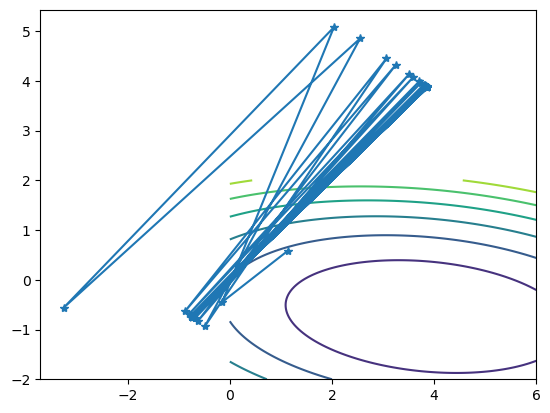

In [137]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6, 100) #Crea 100 puntos x entre 0 y 6
y = np.linspace(-2, 2, 100) #Crea 100 puntos y entre -2 y 2
xx, yy = np.meshgrid(x, y) #Toma el producto cartesiano de los dos conjuntos de entrada.
                        #xx tiene len(y) filas con x repetido 
                        #yy tiene len(x) columnas con y repetido
zz = np.zeros(xx.shape) #Genera una matriz nula del tamaño de xx
for i in range(xx.shape[0]): #Por cada fila
    for j in range(yy.shape[1]): #Por cada columna
        vec = np.array([[xx[i, j]], [yy[i, j]]]) #Asigna a vec un punto del producto cartesiano
        zz[i, j] = 0.5 * vec.T @ A @ vec - b.T @ vec #Obtiene la derivada direccional en la direccion de vec

plt.contour(xx, yy, zz) #Dibuja líneas de contorno 
plt.plot(X[:, 0], X[:, 1], '*-')
plt.show()


c) ¿Qué se muestra en el gráfico obtenido? ¿Qué se observa?